In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/best-selling-books.csv')

In [13]:
df.head() # ilk 5 setiri gosterir
df.info() # data haqqinda
df.shape # setir ve sutun sayisi
df.describe() # ozel istatiska

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


,First published,Approximate sales in millions
count,174.000000,174.000000
mean,1962.522989,30.097126
std,64.268737,27.957985
min,1304.000000,10.000000
25%,1947.000000,14.000000
50%,1974.000000,20.000000
75%,1995.000000,36.300000
max,2018.000000,200.000000


In [16]:
df['First published'].max()

2018

In [22]:
df_publish = df.groupby('First published')['Approximate sales in millions'].value_counts(ascending=False).reset_index(name='Count').head(10)

In [23]:
df_publish

,First published,Approximate sales in millions,Count
0,1304,11.5,1
1,1788,25.0,1
2,1791,100.0,1
3,1813,20.0,1
4,1859,200.0,1
5,1869,36.0,1
6,1877,50.0,1
7,1880,50.0,2
8,1881,35.0,1
9,1885,20.0,1


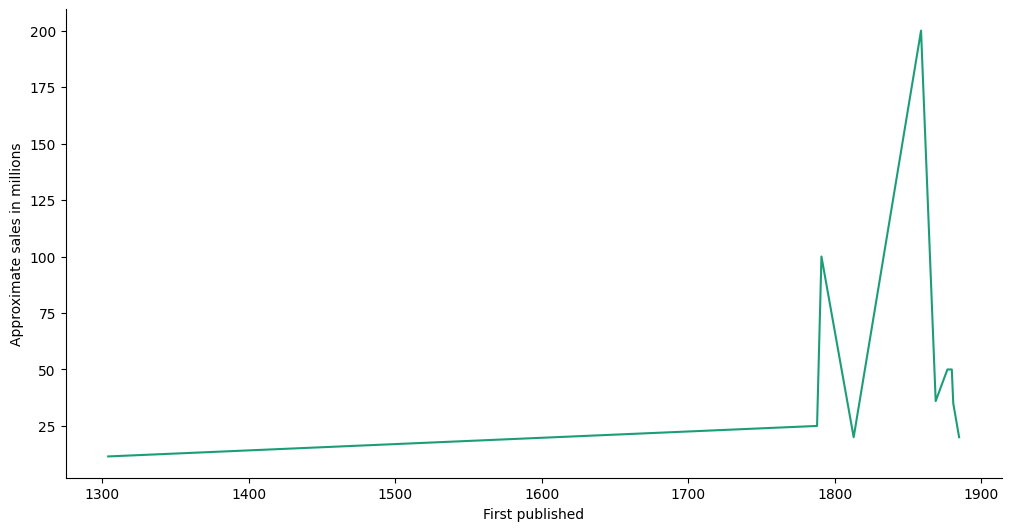

In [24]:
# @title First published vs Approximate sales in millions

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['First published']
  ys = series['Approximate sales in millions']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_publish.sort_values('First published', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('First published')
_ = plt.ylabel('Approximate sales in millions')

In [25]:
df.columns

Index(['Book', 'Author(s)', 'Original language', 'First published',
       'Approximate sales in millions', 'Genre'],
      dtype='object')

In [27]:
df['Genre']

,Genre
0,Historical fiction
1,Novella
2,Fantasy
3,Mystery
4,Family saga
...,...
169,NaN
170,NaN
171,NaN
172,NaN


In [31]:
df[(df['Genre'] == 'Novella')]

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella


In [33]:
df.isnull().sum()

,0
Book,0
Author(s),0
Original language,0
First published,0
Approximate sales in millions,0
Genre,56


In [35]:
df.isnull().sum() / len(df) * 100

,0
Book,0.000000
Author(s),0.000000
Original language,0.000000
First published,0.000000
Approximate sales in millions,0.000000
Genre,32.183908


In [39]:
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

/tmp/ipython-input-39-3969028657.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)


In [40]:
df.isnull().sum()

,0
Book,0
Author(s),0
Original language,0
First published,0
Approximate sales in millions,0
Genre,0


In [41]:
df.isnull().sum() / len(df) * 100

,0
Book,0.0
Author(s),0.0
Original language,0.0
First published,0.0
Approximate sales in millions,0.0
Genre,0.0
